In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/STAT_312/Homework/healthcare.csv'
path2 = '/content/drive/MyDrive/STAT_312/Homework/affairs.xlsx'
df = pd.read_csv(path)
df2 = pd.read_excel(path2)

#Checking if there are any missing values
df.isna()
df2.isna()

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affairs_yes_no
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6361,False,False,False,False,False,False,False,False,False,False,False
6362,False,False,False,False,False,False,False,False,False,False,False
6363,False,False,False,False,False,False,False,False,False,False,False
6364,False,False,False,False,False,False,False,False,False,False,False


# For this demonstration, I want to check the correlation between Cholesterol and 2nd Heart Attack


In [ ]:
# Switching "No" and "Yes" to binary numbers but in new variable

df['2nd_Heart_Attack_numeric'] = df['2nd_Heart_Attack'].map({'Yes': 1, 'No': 0})

In [ ]:
#Checking if anyone has high level of cholesterol.

cholesterol_over_240 = df[df['Cholesterol'] > 240].shape[0]
cholesterol_over_240

0

In [ ]:
#Checking if anyone has low level of cholesterol.

cholesterol_over_240 = df[df['Cholesterol'] < 120].shape[0]
cholesterol_over_240

0

In [ ]:
#I am categorizing the levels of cholesterol. < 200 is low. 200 < x > 239 is borderline.

df['Cholesterol'] = pd.cut(df['Cholesterol'], bins = [0, 120, 200, 239], labels = ['Low', 'Ideal', 'Borderline'])

print(df)

     Age  Marital_Status  Gender  Weight_Category Cholesterol  \
0     60               2       0                1       Ideal   
1     69               2       1                1       Ideal   
2     52               1       0                0       Ideal   
3     66               2       1                1       Ideal   
4     70               3       0                1  Borderline   
..   ...             ...     ...              ...         ...   
133   54               1       0                0       Ideal   
134   59               1       0                0       Ideal   
135   55               3       0                0       Ideal   
136   73               2       1                1  Borderline   
137   62               3       0                0       Ideal   

     Stress_Management  Trait_Anxiety 2nd_Heart_Attack  \
0                    1             50              Yes   
1                    0             60              Yes   
2                    1             35        

In [ ]:
#Now I am categorizing them into numbers

df['Cholesterol'] = df['Cholesterol'].map({'Low': 1, 'Ideal': 2, 'Borderline': 3})
df.head()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,2nd_Heart_Attack_numeric
0,60,2,0,1,2,1,50,Yes,1
1,69,2,1,1,2,0,60,Yes,1
2,52,1,0,0,2,1,35,No,0
3,66,2,1,1,2,0,60,Yes,1
4,70,3,0,1,3,0,65,Yes,1


In [ ]:
#Creating Dummy Variable for Cholesterol

cholesterol_dummies = pd.get_dummies(df['Cholesterol'], prefix='Cholesterol', dtype = float)
df = df.join(cholesterol_dummies)
df

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,2nd_Heart_Attack_numeric,Cholesterol_1,Cholesterol_2,Cholesterol_3
0,60,2,0,1,2,1,50,Yes,1,0.0,1.0,0.0
1,69,2,1,1,2,0,60,Yes,1,0.0,1.0,0.0
2,52,1,0,0,2,1,35,No,0,0.0,1.0,0.0
3,66,2,1,1,2,0,60,Yes,1,0.0,1.0,0.0
4,70,3,0,1,3,0,65,Yes,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
133,54,1,0,0,2,1,35,No,0,0.0,1.0,0.0
134,59,1,0,0,2,0,60,No,0,0.0,1.0,0.0
135,55,3,0,0,2,1,45,No,0,0.0,1.0,0.0
136,73,2,1,1,3,0,60,Yes,1,0.0,0.0,1.0


In [ ]:
#Correlation

df.corr(numeric_only=True)

,Age,Marital_Status,Gender,Weight_Category,Stress_Management,Trait_Anxiety,2nd_Heart_Attack_numeric,Cholesterol_1,Cholesterol_2,Cholesterol_3
Age,1.000000,0.427159,0.076195,0.402007,-0.359295,0.667169,0.499182,NaN,-0.389931,0.389931
Marital_Status,0.427159,1.000000,-0.033225,0.065402,-0.291773,0.238340,0.364978,NaN,-0.307918,0.307918
Gender,0.076195,-0.033225,1.000000,0.448531,-0.241320,0.082007,0.317746,NaN,-0.214648,0.214648
Weight_Category,0.402007,0.065402,0.448531,1.000000,-0.347322,0.501244,0.730832,NaN,-0.395483,0.395483
Stress_Management,-0.359295,-0.291773,-0.241320,-0.347322,1.000000,-0.321362,-0.439473,NaN,0.385317,-0.385317
Trait_Anxiety,0.667169,0.238340,0.082007,0.501244,-0.321362,1.000000,0.482548,NaN,-0.468084,0.468084
2nd_Heart_Attack_numeric,0.499182,0.364978,0.317746,0.730832,-0.439473,0.482548,1.000000,NaN,-0.523120,0.523120
Cholesterol_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol_2,-0.389931,-0.307918,-0.214648,-0.395483,0.385317,-0.468084,-0.523120,NaN,1.000000,-1.000000
Cholesterol_3,0.389931,0.307918,0.214648,0.395483,-0.385317,0.468084,0.523120,NaN,-1.000000,1.000000


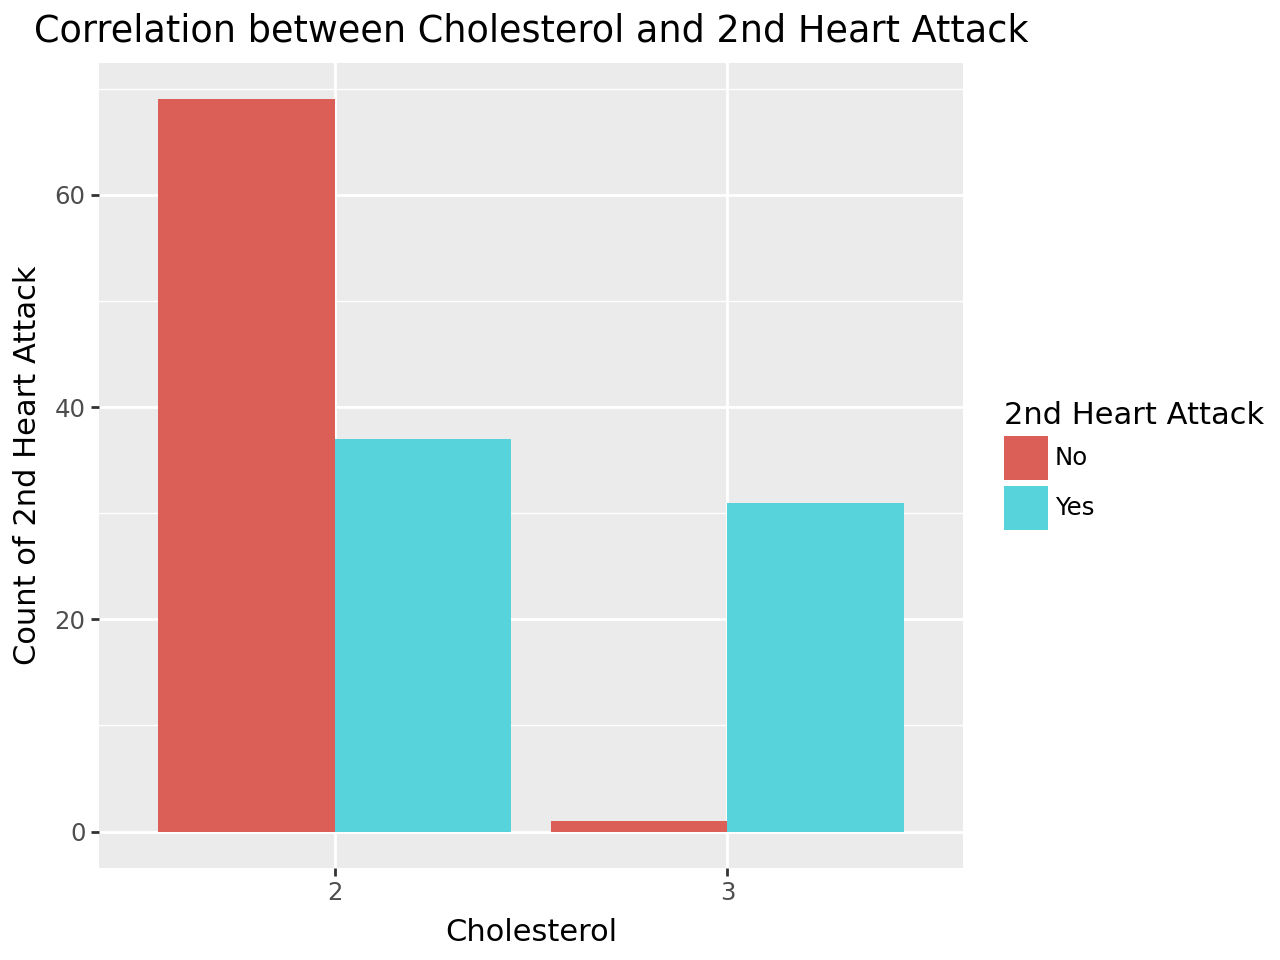

In [ ]:
# Graph for correlation
(ggplot(df)  # defining what data to use
 + aes(x='Cholesterol', fill='2nd_Heart_Attack')  # defining what variables to use
 + geom_bar(position='dodge')  # defining the type of plot to use
 + labs(title="Correlation between Cholesterol and 2nd Heart Attack",
        x="Cholesterol",
        y="Count of 2nd Heart Attack",
        fill="2nd Heart Attack")
)

In [ ]:
#Checking the counts of low and high cholesterol

cholesterol_counts = df['Cholesterol'].value_counts()
print(cholesterol_counts)

Cholesterol
2    106
3     32
1      0
Name: count, dtype: int64


# Question 1 answers from a to c

**a. What is the goal of correlation analysis?**

- The goal of correlation analysis is to see the relationship between two variables, how much one affects the other.

**b. What types of data transformation did you have to do for correlation analysis?**

- I chose Cholesterol as an example for this question. Cholesterol is a numerical variable. I think we can understand and analyze better if we categorize into these three groups: "low", , "ideal", "borderline", "high".

  After checking if there are any cholesterol levels above 240, which is considered "high", it looks like there is no one with high cholesterol.

  Therefore, I only put them into two categores: "low", "ideal" and "borderline".

  From here, because I turned it into a categorical variable. I created dummy variables and labeled "low" as 1, "ideal" as 2 and "borderline" as 3.

  For 2nd_Heart_Attack, it is a categorical variable. I first turned "yes" and "no" into binary answers to be able to analyze it. I created dummmy variables in order to see the correlation.

**c. Explain the results of the correlation analysis?**

- After running the corr() function between the variables Cholesterol and 2nd_Heart_Attack, it looks like having borderline cholesterol has a higher relationship with 2nd_Heart_Attack than having ideal cholesterol.

  However, the visualization I created for it has higher frequency on the ideal cholesterol category. To see if the dataset has somewhat equal amounts of ideal and borderline cholesterol, I checked the counts. Ideal cholesterol in the data has 106, while borderline has 32. This could be the reason why Ideal cholesterol has a higher frequency.

  You can also see that most people with high cholesterol experienced 2nd Heart Attack.


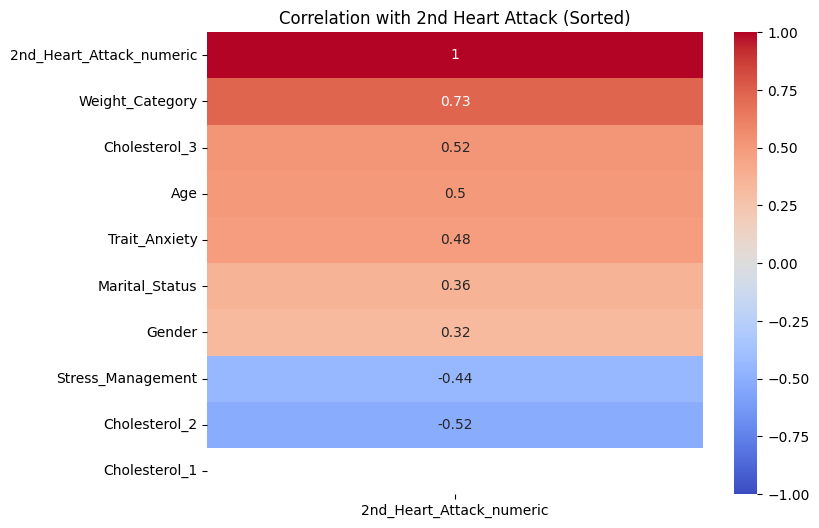

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Extract the correlations with '2nd_Heart_Attack_numeric'
correlation_with_2nd_heart_attack = correlation_matrix[['2nd_Heart_Attack_numeric']]

# Sort the correlations by actual values from most positive to most negative
sorted_correlation = correlation_with_2nd_heart_attack.sort_values(by='2nd_Heart_Attack_numeric', ascending=False)

# Create a heatmap for the sorted correlation
plt.figure(figsize=(8, 6))
sns.heatmap(sorted_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with 2nd Heart Attack (Sorted)')
plt.show()



# Weight, Cholesterol, Age, and Anxiety are on the top of the heatmap, so I will check the correlation of these 4 with 2nd_Heart_Attack to show and accurately answer questions d and e

In [ ]:
#Correlation between weight and 2nd_Heart_Attack
#Weight is already categorized, so we can jump into creating dummy variables

weight_dummies = pd.get_dummies(df['Weight_Category'], prefix='Weight_Category', dtype = float)
df = df.join(weight_dummies)
df

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,2nd_Heart_Attack_numeric,Cholesterol_1,Cholesterol_2,Cholesterol_3,Weight_Category_0,Weight_Category_1,Weight_Category_2
0,60,2,0,1,2,1,50,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0
1,69,2,1,1,2,0,60,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0
2,52,1,0,0,2,1,35,No,0,0.0,1.0,0.0,1.0,0.0,0.0
3,66,2,1,1,2,0,60,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0
4,70,3,0,1,3,0,65,Yes,1,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,54,1,0,0,2,1,35,No,0,0.0,1.0,0.0,1.0,0.0,0.0
134,59,1,0,0,2,0,60,No,0,0.0,1.0,0.0,1.0,0.0,0.0
135,55,3,0,0,2,1,45,No,0,0.0,1.0,0.0,1.0,0.0,0.0
136,73,2,1,1,3,0,60,Yes,1,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#Correlation

df.corr(numeric_only=True)

,Age,Marital_Status,Gender,Weight_Category,Stress_Management,Trait_Anxiety,2nd_Heart_Attack_numeric,Cholesterol_1,Cholesterol_2,Cholesterol_3,Weight_Category_0,Weight_Category_1,Weight_Category_2
Age,1.000000,0.427159,0.076195,0.402007,-0.359295,0.667169,0.499182,NaN,-0.389931,0.389931,-0.502928,0.340887,0.159133
Marital_Status,0.427159,1.000000,-0.033225,0.065402,-0.291773,0.238340,0.364978,NaN,-0.307918,0.307918,-0.093517,0.077854,0.013216
Gender,0.076195,-0.033225,1.000000,0.448531,-0.241320,0.082007,0.317746,NaN,-0.214648,0.214648,-0.465250,0.196746,0.281433
Weight_Category,0.402007,0.065402,0.448531,1.000000,-0.347322,0.501244,0.730832,NaN,-0.395483,0.395483,-0.854024,0.087754,0.826006
Stress_Management,-0.359295,-0.291773,-0.241320,-0.347322,1.000000,-0.321362,-0.439473,NaN,0.385317,-0.385317,0.299208,-0.035432,-0.284087
Trait_Anxiety,0.667169,0.238340,0.082007,0.501244,-0.321362,1.000000,0.482548,NaN,-0.468084,0.468084,-0.448879,0.083823,0.391489
2nd_Heart_Attack_numeric,0.499182,0.364978,0.317746,0.730832,-0.439473,0.482548,1.000000,NaN,-0.523120,0.523120,-0.666185,0.144626,0.558125
Cholesterol_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol_2,-0.389931,-0.307918,-0.214648,-0.395483,0.385317,-0.468084,-0.523120,NaN,1.000000,-1.000000,0.388514,-0.131905,-0.271671
Cholesterol_3,0.389931,0.307918,0.214648,0.395483,-0.385317,0.468084,0.523120,NaN,-1.000000,1.000000,-0.388514,0.131905,0.271671


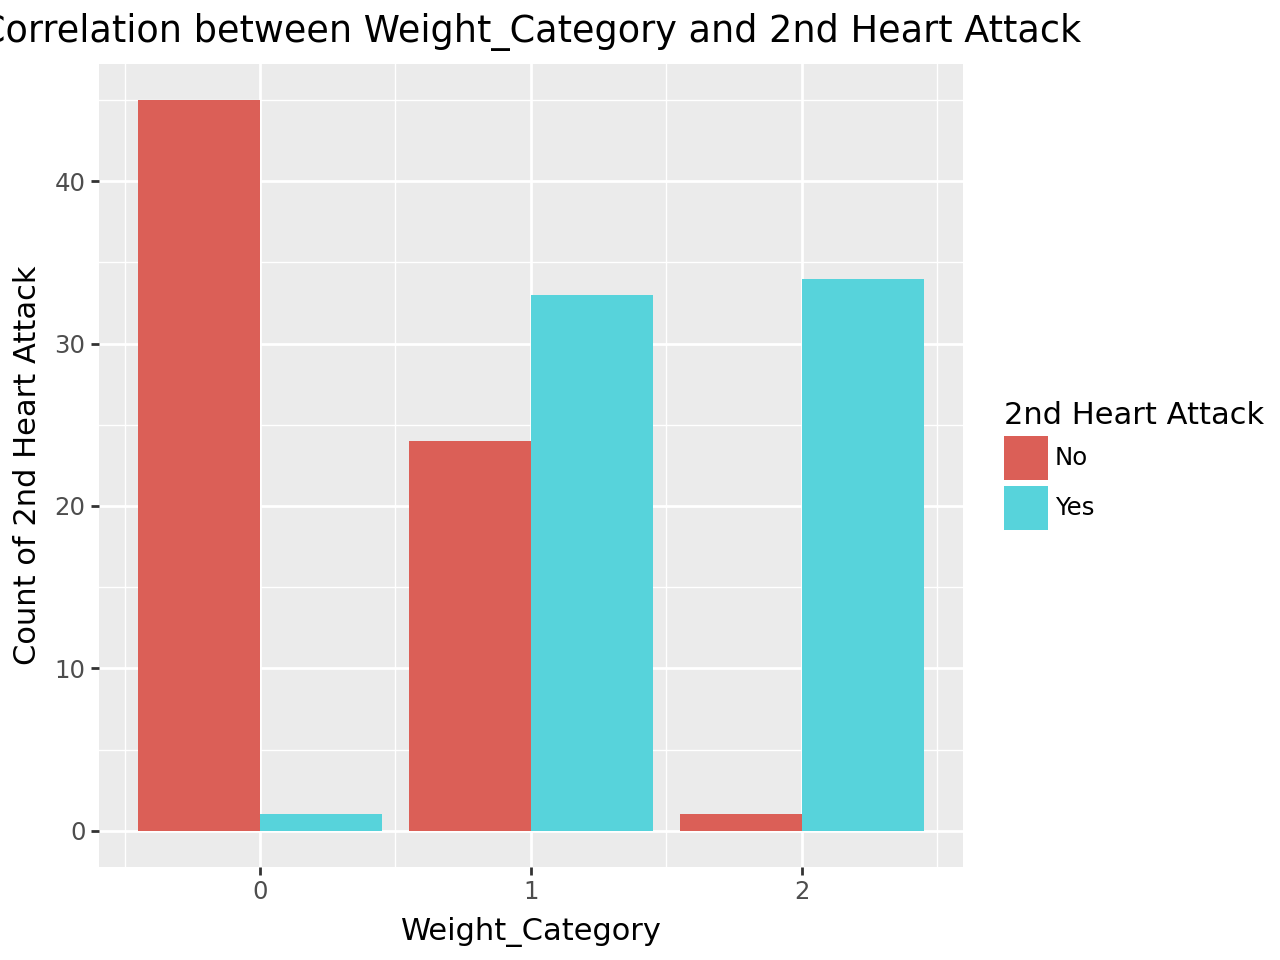

In [ ]:
# Graph for correlation
(ggplot(df)
 + aes(x='Weight_Category', fill='2nd_Heart_Attack')
 + geom_bar(position='dodge')
 + labs(title="Correlation between Weight_Category and 2nd Heart Attack",
        x="Weight_Category",
        y="Count of 2nd Heart Attack",
        fill="2nd Heart Attack")
)

In [ ]:
#Checking Counts of Each Category under Weight

weight_counts = df['Weight_Category'].value_counts()
print(weight_counts)



Weight_Category
1    57
0    46
2    35
Name: count, dtype: int64


In [ ]:
#Correlation of Age and 2nd_Heart_Attack
#I am categorizing the levels of Ages. Child 0–14 years, 15–24 years Youth, 25–64 years Adult
#65 years and older Senior

df['Age'] = pd.cut(df['Age'], bins = [0, 14, 24, 64, 100], labels = ['Child', 'Youth', 'Adult', 'Senior'])

print(df)


        Age  Marital_Status  Gender  Weight_Category Cholesterol  \
0     Adult               2       0                1           2   
1    Senior               2       1                1           2   
2     Adult               1       0                0           2   
3    Senior               2       1                1           2   
4    Senior               3       0                1           3   
..      ...             ...     ...              ...         ...   
133   Adult               1       0                0           2   
134   Adult               1       0                0           2   
135   Adult               3       0                0           2   
136  Senior               2       1                1           3   
137   Adult               3       0                0           2   

     Stress_Management  Trait_Anxiety 2nd_Heart_Attack  \
0                    1             50              Yes   
1                    0             60              Yes   
2        

In [ ]:
#Now I am categorizing them into numbers

df['Age'] = df['Age'].map({'Child': 1, 'Youth': 2, 'Adult': 3, 'Senior': 4})
df.head()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,2nd_Heart_Attack_numeric,Cholesterol_1,Cholesterol_2,Cholesterol_3,Weight_Category_0,Weight_Category_1,Weight_Category_2
0,3,2,0,1,2,1,50,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0
1,4,2,1,1,2,0,60,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0
2,3,1,0,0,2,1,35,No,0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,2,1,1,2,0,60,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0
4,4,3,0,1,3,0,65,Yes,1,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
age_dummies = pd.get_dummies(df['Age'], prefix='Age', dtype = float)
df = df.join(age_dummies)
df

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,2nd_Heart_Attack_numeric,Cholesterol_1,Cholesterol_2,Cholesterol_3,Weight_Category_0,Weight_Category_1,Weight_Category_2,Age_1,Age_2,Age_3,Age_4
0,3,2,0,1,2,1,50,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4,2,1,1,2,0,60,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0,0,2,1,35,No,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,2,1,1,2,0,60,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,3,0,1,3,0,65,Yes,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,3,1,0,0,2,1,35,No,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
134,3,1,0,0,2,0,60,No,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
135,3,3,0,0,2,1,45,No,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
136,4,2,1,1,3,0,60,Yes,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.corr(numeric_only=True)

,Marital_Status,Gender,Weight_Category,Stress_Management,Trait_Anxiety,2nd_Heart_Attack_numeric,Cholesterol_1,Cholesterol_2,Cholesterol_3,Weight_Category_0,Weight_Category_1,Weight_Category_2,Age_1,Age_2,Age_3,Age_4
Marital_Status,1.000000,-0.033225,0.065402,-0.291773,0.238340,0.364978,NaN,-0.307918,0.307918,-0.093517,0.077854,0.013216,NaN,NaN,-0.426948,0.426948
Gender,-0.033225,1.000000,0.448531,-0.241320,0.082007,0.317746,NaN,-0.214648,0.214648,-0.465250,0.196746,0.281433,NaN,NaN,0.023217,-0.023217
Weight_Category,0.065402,0.448531,1.000000,-0.347322,0.501244,0.730832,NaN,-0.395483,0.395483,-0.854024,0.087754,0.826006,NaN,NaN,-0.205742,0.205742
Stress_Management,-0.291773,-0.241320,-0.347322,1.000000,-0.321362,-0.439473,NaN,0.385317,-0.385317,0.299208,-0.035432,-0.284087,NaN,NaN,0.385769,-0.385769
Trait_Anxiety,0.238340,0.082007,0.501244,-0.321362,1.000000,0.482548,NaN,-0.468084,0.468084,-0.448879,0.083823,0.391489,NaN,NaN,-0.492295,0.492295
2nd_Heart_Attack_numeric,0.364978,0.317746,0.730832,-0.439473,0.482548,1.000000,NaN,-0.523120,0.523120,-0.666185,0.144626,0.558125,NaN,NaN,-0.408047,0.408047
Cholesterol_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol_2,-0.307918,-0.214648,-0.395483,0.385317,-0.468084,-0.523120,NaN,1.000000,-1.000000,0.388514,-0.131905,-0.271671,NaN,NaN,0.254012,-0.254012
Cholesterol_3,0.307918,0.214648,0.395483,-0.385317,0.468084,0.523120,NaN,-1.000000,1.000000,-0.388514,0.131905,0.271671,NaN,NaN,-0.254012,0.254012
Weight_Category_0,-0.093517,-0.465250,-0.854024,0.299208,-0.448879,-0.666185,NaN,0.388514,-0.388514,1.000000,-0.593171,-0.412193,NaN,NaN,0.300361,-0.300361


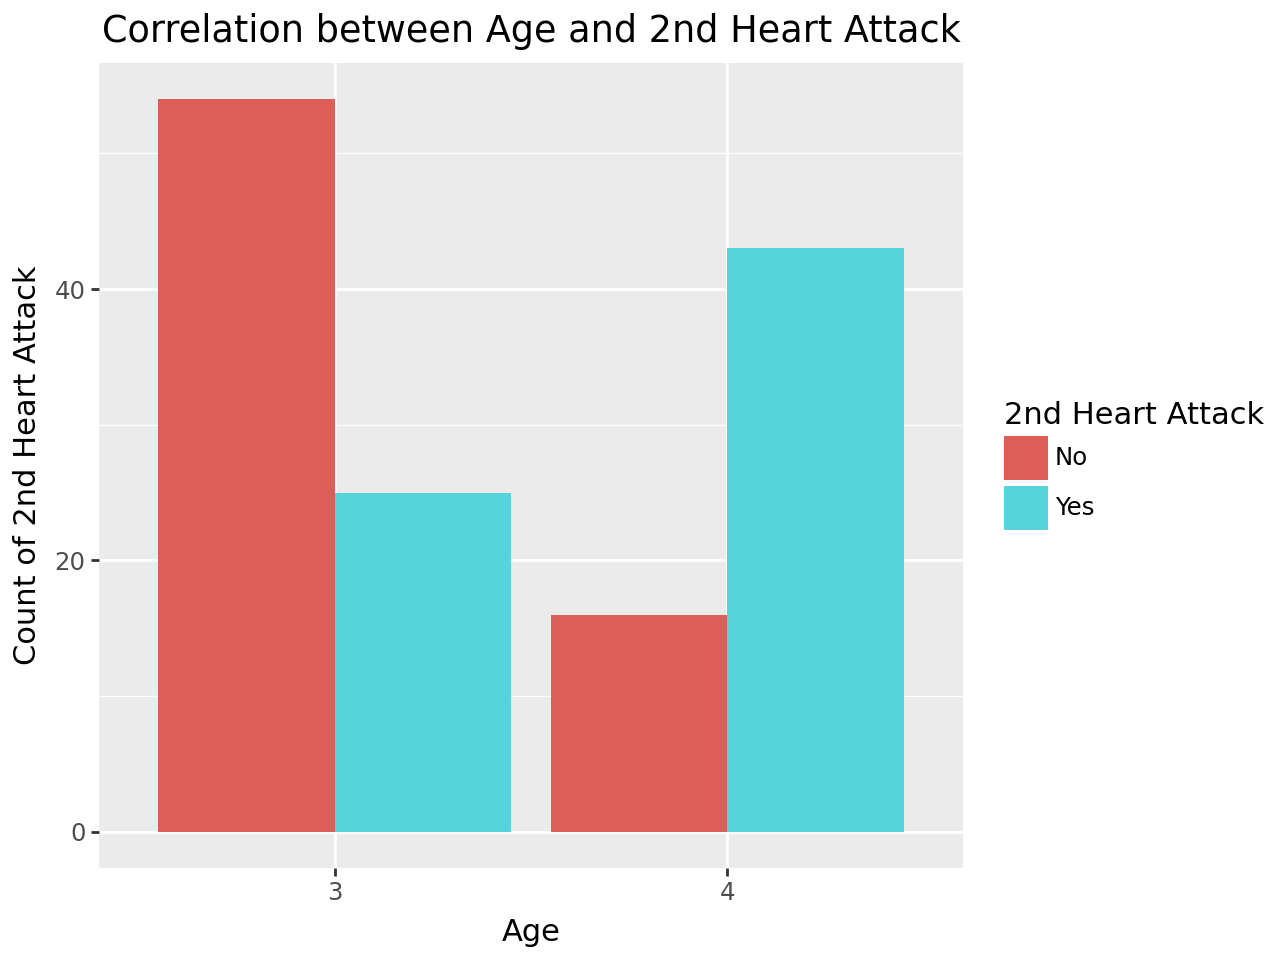

In [ ]:
(ggplot(df)
+ aes(x='Age', fill = '2nd_Heart_Attack')
+ geom_bar(position='dodge')
+ labs(title="Correlation between Age and 2nd Heart Attack",
        x="Age",
        y="Count of 2nd Heart Attack",
        fill="2nd Heart Attack")
)

In [ ]:
age_counts = df['Age'].value_counts()
print(age_counts)

Age
3    79
4    59
1     0
2     0
Name: count, dtype: int64


# The Subjective Units of Distress Scale (SUDS) is a 0–100 scale that measures the level of anxiety someone experiences. The scale is often used by exposure therapists to rate anxiety during exposure exercises. Here are some of the guide points for the SUDS scale:
100: Unbearable anxiety that makes it difficult to function and may lead to a breakdown

90: Extreme anxiety and desperation, feeling helpless and unable to cope

80: Worried and panicky, losing focus and feeling anxious in the body

60: Moderate to strong levels of discomfort

50: Upset and uncomfortable, but still functional

40: Mild to moderate anxiety and worry

0: No anxiety at all, completely calm

3: Some anxiety, but manageable

5: Getting tough, but wouldn't want to have it all the time

7-8: Severe anxiety that interferes with daily life

In [ ]:
#Anxiety and 2nd_Heart_Attack

Trait_Anxiety_counts = df['Trait_Anxiety'].value_counts()
print(Trait_Anxiety_counts)

Trait_Anxiety
60    32
50    24
45    16
40    16
65    12
80    10
35     8
55     8
75     6
70     6
Name: count, dtype: int64


In [ ]:
#80: Worried and panicky, losing focus and feeling anxious in the body
#60: Moderate to strong levels of discomfort
#50: Upset and uncomfortable, but still functional
#35: Mild to moderate anxiety and worry

df['Trait_Anxiety'] = pd.cut(df['Trait_Anxiety'], bins = [0, 35, 50, 60, 80], labels = ['Mild', 'Moderate', 'Strong', 'Severe'])

print(df)

    Age  Marital_Status  Gender  Weight_Category Cholesterol  \
0     3               2       0                1           2   
1     4               2       1                1           2   
2     3               1       0                0           2   
3     4               2       1                1           2   
4     4               3       0                1           3   
..   ..             ...     ...              ...         ...   
133   3               1       0                0           2   
134   3               1       0                0           2   
135   3               3       0                0           2   
136   4               2       1                1           3   
137   3               3       0                0           2   

     Stress_Management Trait_Anxiety 2nd_Heart_Attack  \
0                    1      Moderate              Yes   
1                    0        Strong              Yes   
2                    1          Mild               No   
3  

In [ ]:
df['Trait_Anxiety'] = df['Trait_Anxiety'].map({'Mild': 1, 'Moderate': 2, 'Strong': 3, 'Severe': 4})
df.head()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,2nd_Heart_Attack_numeric,Cholesterol_1,Cholesterol_2,Cholesterol_3,Weight_Category_0,Weight_Category_1,Weight_Category_2,Age_1,Age_2,Age_3,Age_4
0,3,2,0,1,2,1,2,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4,2,1,1,2,0,3,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0,0,2,1,1,No,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,2,1,1,2,0,3,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,3,0,1,3,0,4,Yes,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#dummy variables for Anxety_Trait

anxiety_dummies = pd.get_dummies(df['Trait_Anxiety'], prefix='Trait_Anxiety', dtype = float)
df = df.join(anxiety_dummies)
df

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,2nd_Heart_Attack_numeric,Cholesterol_1,...,Weight_Category_1,Weight_Category_2,Age_1,Age_2,Age_3,Age_4,Trait_Anxiety_1,Trait_Anxiety_2,Trait_Anxiety_3,Trait_Anxiety_4
0,3,2,0,1,2,1,2,Yes,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,4,2,1,1,2,0,3,Yes,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,1,0,0,2,1,1,No,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,2,1,1,2,0,3,Yes,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,4,3,0,1,3,0,4,Yes,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,3,1,0,0,2,1,1,No,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
134,3,1,0,0,2,0,3,No,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
135,3,3,0,0,2,1,2,No,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
136,4,2,1,1,3,0,3,Yes,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df.corr(numeric_only=True)

,Marital_Status,Gender,Weight_Category,Stress_Management,2nd_Heart_Attack_numeric,Cholesterol_1,Cholesterol_2,Cholesterol_3,Weight_Category_0,Weight_Category_1,Weight_Category_2,Age_1,Age_2,Age_3,Age_4,Trait_Anxiety_1,Trait_Anxiety_2,Trait_Anxiety_3,Trait_Anxiety_4
Marital_Status,1.000000,-0.033225,0.065402,-0.291773,0.364978,NaN,-0.307918,0.307918,-0.093517,0.077854,0.013216,NaN,NaN,-0.426948,0.426948,-0.209970,-0.214682,0.119980,0.232192
Gender,-0.033225,1.000000,0.448531,-0.241320,0.317746,NaN,-0.214648,0.214648,-0.465250,0.196746,0.281433,NaN,NaN,0.023217,-0.023217,-0.319022,0.063995,0.233107,-0.145352
Weight_Category,0.065402,0.448531,1.000000,-0.347322,0.730832,NaN,-0.395483,0.395483,-0.854024,0.087754,0.826006,NaN,NaN,-0.205742,0.205742,-0.299611,-0.223421,0.066833,0.346724
Stress_Management,-0.291773,-0.241320,-0.347322,1.000000,-0.439473,NaN,0.385317,-0.385317,0.299208,-0.035432,-0.284087,NaN,NaN,0.385769,-0.385769,0.278711,0.453038,-0.568639,-0.068706
2nd_Heart_Attack_numeric,0.364978,0.317746,0.730832,-0.439473,1.000000,NaN,-0.523120,0.523120,-0.666185,0.144626,0.558125,NaN,NaN,-0.408047,0.408047,-0.244500,-0.312711,0.168996,0.311022
Cholesterol_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol_2,-0.307918,-0.214648,-0.395483,0.385317,-0.523120,NaN,1.000000,-1.000000,0.388514,-0.131905,-0.271671,NaN,NaN,0.254012,-0.254012,0.136300,0.454056,-0.254494,-0.323396
Cholesterol_3,0.307918,0.214648,0.395483,-0.385317,0.523120,NaN,-1.000000,1.000000,-0.388514,0.131905,0.271671,NaN,NaN,-0.254012,0.254012,-0.136300,-0.454056,0.254494,0.323396
Weight_Category_0,-0.093517,-0.465250,-0.854024,0.299208,-0.666185,NaN,0.388514,-0.388514,1.000000,-0.593171,-0.412193,NaN,NaN,0.300361,-0.300361,0.350823,0.166957,-0.180702,-0.190261
Weight_Category_1,0.077854,0.196746,0.087754,-0.035432,0.144626,NaN,-0.131905,0.131905,-0.593171,1.000000,-0.489002,NaN,NaN,-0.256739,0.256739,-0.208098,0.026062,0.242581,-0.172256


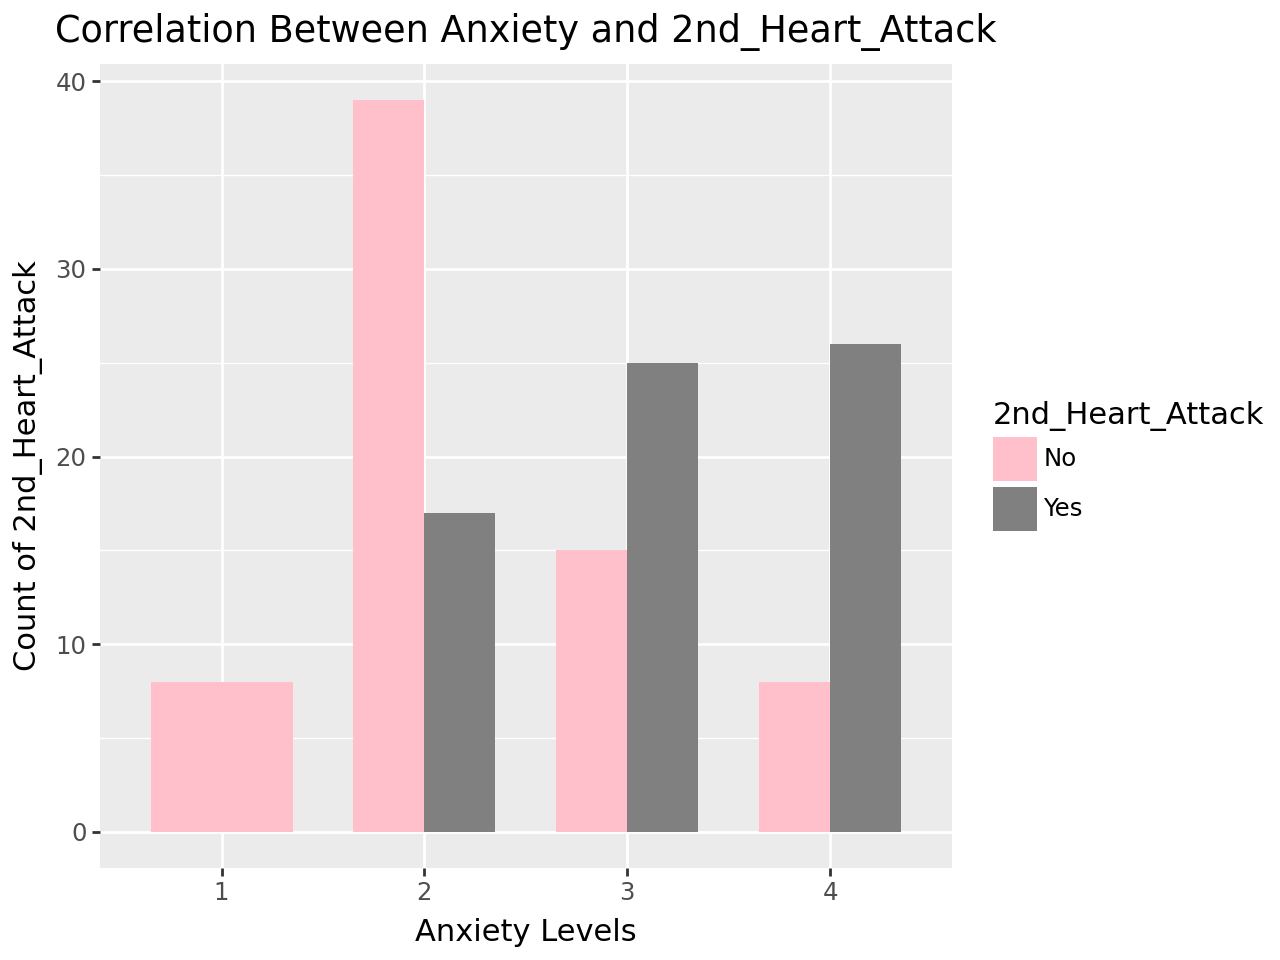

In [ ]:
# Convert '2nd_Heart_Attack' to categorical to ensure proper handling
df['2nd_Heart_Attack'] = df['2nd_Heart_Attack'].astype('category')

# Now try plotting again
(ggplot(df)
 + aes(x='Trait_Anxiety', fill='2nd_Heart_Attack')
 + geom_bar(position='dodge', width=0.7)
 + labs(title='Correlation Between Anxiety and 2nd_Heart_Attack',
        x='Anxiety Levels',
        y='Count of 2nd_Heart_Attack')
 + scale_fill_manual(values=['pink', 'gray'], labels=["No", "Yes"])  # Color mapping
)

# Question 1 d and e

**d. Describe the characteristics of people who are at risk of having 2nd heart attack.**

- Individuals with high cholesterol, who are overweight, 65+ years old, and strong to severe levels of anxiety are the people at high risk of having another heart attack.

**e. What is your general recommendation for the healthcare provider?**

Given that the healthcare provider wants to help these indivudals avoid experencing another heart atack, I would suggest changing their diets to keep their cholesterol and weight in normal levels, and either get prescribed for anti-anxiety pills or learn how to manage them. We can't control age, but these changes can still help seniors avoid heart attacks.

In [ ]:
#Question 2a:

df2.value_counts('affairs_yes_no')

,count
affairs_yes_no,
0,4313
1,2053


In [ ]:
#Question 2b: grouping data by rate_marriage and find avg affairs and age for each group

df2.groupby('rate_marriage')[['affairs_yes_no', 'age']].mean()


,affairs_yes_no,age
rate_marriage,,
1,0.747475,33.823232
2,0.635057,30.471264
3,0.550856,30.008056
4,0.322926,28.856601
5,0.181446,28.574702


In [ ]:
df2.groupby('affairs_yes_no').agg(
    avg_rateaffair=('rate_marriage', 'mean'),
    total_rateaffair=('rate_marriage', 'sum'),
    avg_age=('age', 'mean'),
    total_children=('children', 'sum'),
    avg_children=('children', 'mean'),
    avg_yrs_married=('yrs_married', 'mean'),
    avg_religious=('religious', 'mean')
)

,avg_rateaffair,total_rateaffair,avg_age,total_children,avg_children,avg_yrs_married,avg_religious
affairs_yes_no,,,,,,,
0,4.329701,18674,28.390679,5343.0,1.238813,7.989335,2.504521
1,3.647345,7488,30.537019,3549.5,1.728933,11.152460,2.261568


# Question 2b; explaining groupby() and its general findings.

groupby() function in pandas is used to split the data into groups according to the unique values. Each unique value becomes a group.

Inside the [], these are the columns we selected from the data. This specifies that we only want to work with variables inside the [] for each group.

There are many functions we can do on the variables inside [], such as .mean() (which is an aggregation function). Everything after the [] will apply to just the columns specified inside, BUT using the groups (unique values) from groupby().

In the second example above, usinng .agg(); thsi function allows us to apply multiple functions at once. Instead of doing '.mean()', we can simply use .agg(avg_affairs = ('affairs', 'mean')), avg_age=('age', 'mean').

Some general findings using groupby():

Married couples who have had affairs, on average have been married for 11 years. They are also mildly religious, have 1-2 children, and at the age of 30.

In [ ]:
from scipy.stats import normaltest, ttest_ind

In [ ]:
# Is there a statistically significant difference between those having affairs and those don’t in terms of religious devotion?
#Explain the relationship between religious devotion and affairs.

affairs_yes = df2[df2['affairs_yes_no'] == 1]['religious']
affairs_no = df2[df2['affairs_yes_no'] == 0]['religious']

stat, p = normaltest(affairs_yes)
print(f'Religious Married Couple: Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = normaltest(affairs_no)
print(f'Non-Religious Married Couple: Statistics=%.3f, p=%.3f' % (stat,p))

Religious Married Couple: Statistics=119.479, p=0.000
Non-Religious Married Couple: Statistics=258.107, p=0.000


Normal Distribution Test:

H_0: Religious Married Couple is normally distributed
H_a: Religious Married Couple is NOT normally distributed

Using alpha = 0.05, we can conclude that the p-value for Religious Married Couple (0.00) is less than the significance level. With this information, we can safely reject H_0.

H_0: Non-Religious Couple is normally distributed
H_a: Non-Religiois Couple is NOT nromally distributed

Using alpha = 0.05, we can conclude that the p-value for Non-Religious Married Couple (0.00) is less than the significance level. With this, we can safely reject H_0.

Due to the violation of Normal Distribution Test,
we will perform the Mann-Whitney U Test.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest, mannwhitneyu

In [ ]:
#Since all 4 are not normally distributed, we will use the Mann-Whiteney U Test

#stat, p = mannwhitneyu(male_total_bill, female_total_bill)  #from scipy.stats import manwhiteneyu
#print('Mann-Whitney U Test: Statistics=%.3f, p-value=%.3f' % (stat, p))

stat, p = mannwhitneyu(affairs_yes, affairs_no)
print('Mann-Whitney U Test: Statistics=%.3f, p-value=%.3f' % (stat, p))

#H_0: The two groups have the same distribution
#H_a: The two groups not have the same distribution

Mann-Whitney U Test: Statistics=3764730.000, p-value=0.000


# Question 2c: Is there a statistically significant difference between those having affairs and those don’t in terms of religious devotion? Explain the relationship between religious devotion and affairs.

  To see the relationship between religious devotion and affairs, I attempted to permorm a Hypothesis Test. To complete test, I must first check its normality distribution test.


  Using the significance level of 0.05, both married couples who have had affairs and who have had not have p-values of 0.000, which is less than 0.05.
  This means that both datasets are not normally distributed.


  Due to the violation of the normality test, I then performed the Mann-Whitney U Test, which also came out to be a p-value of 0.000 for both married couples who had had affairs and those who have not. Using the significance level of 0.05, we can conclude that the two groups do not have the same distribution.

  In conclusion, there not enough evidence to claim that there is a staitsically significant difference between the two groups.

In [ ]:
#Is there a statistically significant difference between those having affairs and those don’t in terms
#of rate_marriage? Explain the relationship between rate_marriage and affairs.

yes_affairs = df2[df2['affairs_yes_no'] == 0]['rate_marriage']
no_affairs = df2[df2['affairs_yes_no'] == 1]['rate_marriage']

#Normality Test

stat, p = normaltest(yes_affairs)
print(f'Married Couples Who Have Had an Affair Marriage Rate: Statistics =%.3f, p-value=%.3f' % (stat, p))

stat, p = normaltest(no_affairs)
print(f'Married Couples Who Have Not Had an Affair Marriage Rate: Statistics =%.3f, p-value=%.3f' % (stat, p))

Married Couples Who Have Had an Affair Marriage Rate: Statistics =838.474, p-value=0.000
Married Couples Who Have Not Had an Affair Marriage Rate: Statistics =95.922, p-value=0.000


In [ ]:
stat, p = mannwhitneyu(yes_affairs, no_affairs)
print('Mann-Whitney U Test: Statistics=%.3f, p-value=%.3f' % (stat, p))

Mann-Whitney U Test: Statistics=6081051.000, p-value=0.000


# Question 2d: Is there a statistically significant difference between those having affairs and those don’t in terms of rate_marriage? Explain the relationship between rate_marriage and affairs.

  In order to check the relationship between marriage ratings and affairs, I must perform a Hypothesis Test. First step is to check whether or not it is normally distributed. Using alpha = 0.05, the p-value for both couples who had affairs and who have not is 0.000, which is less than the significance level. This tells us that both datasets are not normmally distributed.

  Due to the violation of the Normality Distribution Test, I performed Mann-Whitney U Test, which also gave me a p-value of 0.000, and using the same significance level, 0.000 is less than 0.05. This means that both groups do not have the same distribution.

  In conclusion, there not enough evidence to claim that there is a staitsically significant difference between the two groups.

In [ ]:
#Is there a statistically significant difference between those having affairs and those don’t in terms of age? Explain the relationship between age and affairs.

yes_age_affairs = df2[df2['affairs_yes_no'] == 0]['age']
no_age_affairs = df2[df2['affairs_yes_no'] == 1]['age']

#Normality Test

stat, p = normaltest(yes_age_affairs)
print(f'Married Couples Who Have Had an Affair (Age): Statistics =%.3f, p-value=%.3f' % (stat, p))

stat, p = normaltest(no_age_affairs)
print(f'Married Couples Who Have Not Had an Affair (Age): Statistics =%.3f, p-value=%.3f' % (stat, p))

Married Couples Who Have Had an Affair (Age): Statistics =389.117, p-value=0.000
Married Couples Who Have Not Had an Affair (Age): Statistics =433.767, p-value=0.000


In [ ]:
stat, p = mannwhitneyu(yes_age_affairs, no_age_affairs)
print('Mann-Whitney U Test: Statistics=%.3f, p-value=%.3f' % (stat, p))

Mann-Whitney U Test: Statistics=3583008.000, p-value=0.000


# Question 2e: Is there a statistically significant difference between those having affairs and those don’t in terms of age? Explain the relationship between age and affairs.

After the attempt of performing a Hypothesis Test to determine the relationship between age and affairs, both Normality Distribution and Mann-Whiteney U Test have rejected the null hypothesis, which means the datatsets are not normally dsitributed and do not have equal distribution.

In conclusion, there not enough evidence to claim that there is a staitsically significant difference between the two groups.


In [ ]:
from scipy import stats

In [ ]:
ks_stat, p_value = stats.ks_2samp(yes_age_affairs, no_age_affairs)

print(f"KS-statistic: {ks_stat}, P-value: {p_value}")


KS-statistic: 0.1483313341816317, P-value: 3.687411600903651e-27


In [ ]:
# Create age categories
df2['age_group'] = pd.cut(df2['age'], bins=[0, 30, 40, 50, 100], labels=['Young', 'Middle-aged', 'Older', 'Senior'])

# Create contingency table
contingency_table = pd.crosstab(df2['age_group'], df2['affairs_yes_no'])

# Perform Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, P-value: {p}")


Chi-square statistic: 117.16148459083325, P-value: 3.6199858696865605e-26


# Question 2f: My own findings

  I wanted to try out different Hypothesis Testing methods I found online.
  I also wanted to stick to age.

  I first attempted Kolmogorov-Smirnov Test, which is used to compare the distribution of two continuous variables or a sample against a reference distribution (like a normal distribution). It checks whether two samples are drawn from the same underlying distribution.

  Null Hypothesis (H₀): The age distribution is the same for those who had affairs and those who did not.
  Alternative Hypothesis (H₁): The age distribution is different for those who had affairs and those who did not.

  Using significance level of 0.05, we can say that because the p-value of KS Test Method for the variable 'age' is very small which is 3.687411600903651e-27 compared to alpha, we reject the null hypothesis. In this case, the two sample datas for age do NOT have the same distribution for thos who had affairs and those who did not.

  As for the Chi-Square Test, it is used to check the association or independence between two categorical variables. It determines whether there is a significant association between the categories of one variable and the categories of another variable.

  The Chi-Square test confirms that age group (categorized) is significantly associated with the likelihood of having an affair, meaning some age groups are more likely to report having an affair than others.

  Null Hypothesis (H₀): There is no association between age groups and having an affair.
  Alternative Hypothesis (H₁): There is an association between age groups and having an affair.

  Still using the significance level of 0.05, after processing the Chi-Square Test, we get a p-value of 3.6199858696865605e-26, which is again, a lot smalller compared to alpha. Ergo, we can reject the null hypothesis. This indicates that there is an association between age groups and having affairs.